In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Step 1: Loading the dataset.

The dataset for housing has been loaded. This is downloaded  from ```kaggle.com```

In [33]:
housing = pd.read_csv('housing.csv')

### Step 2: Exploration and data cleaning


In [3]:
housing.shape

(20640, 10)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Eliminate duplicates/ irrelavant information
(if any)

In [6]:
housing.duplicated().sum()

0

In [7]:
#column to list
housing.columns.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

### Step 3: Analysis of univariate variables



#### Analysis of categorical variables


<Axes: xlabel='ocean_proximity'>

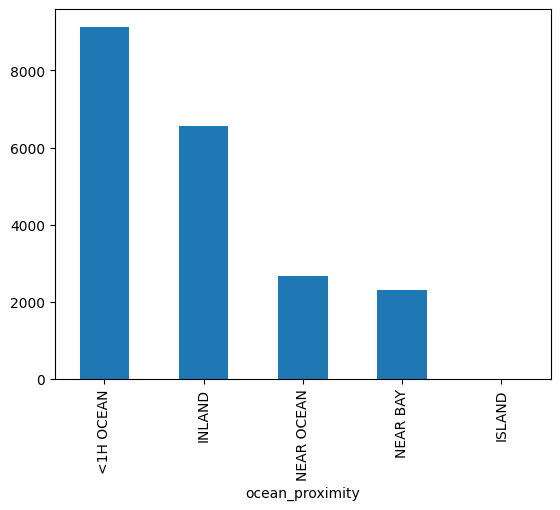

In [8]:
housing['ocean_proximity'].value_counts().plot.bar()

Most houses are within a proximity of less than 1 hour from the ocean, followed by inland houses. Houses near ocean, bay and island are less in number.

#### Analysis on numeric variables

A **numeric variable** is a type of variable that can take numeric values (integers, fractions, decimals, negatives, etc.) in an infinite range. A numerical categorical variable can also be a numerical variable. They are usually represented using a histogram and a boxplot, displayed together. Before starting to plot, we must also identify which are the numerical ones.

In [9]:
mean_total_rooms = housing['total_rooms'].mean()
median_total_rooms = housing['total_rooms'].median()
print("mean area of the house is ", mean_total_rooms)
print("median area of the house is ", median_total_rooms)

mean area of the house is  2635.7630813953488
median area of the house is  2127.0


<Axes: >

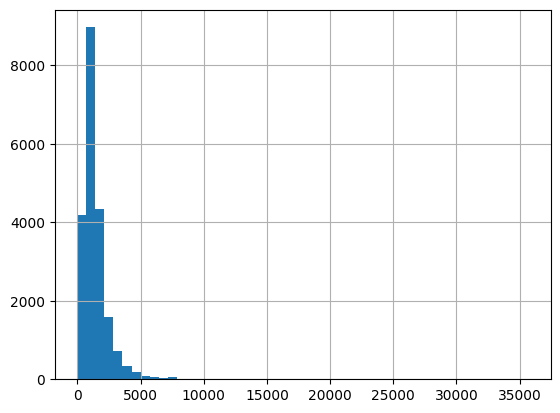

In [10]:
housing['population'].hist(bins=50)

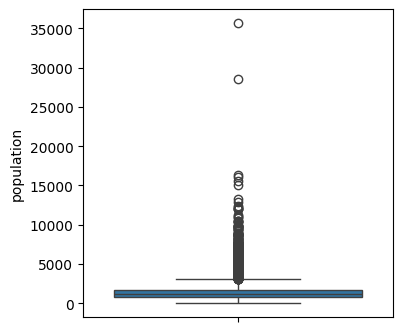

In [11]:
plt.figure(figsize=(4,4))
sns.boxplot(housing['population'])
plt.show()

<Axes: >

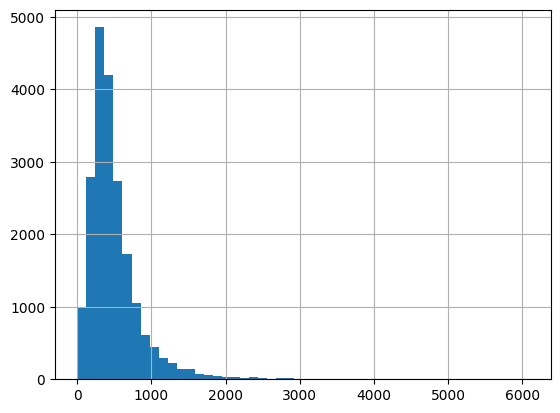

In [12]:
housing['households'].hist(bins=50)

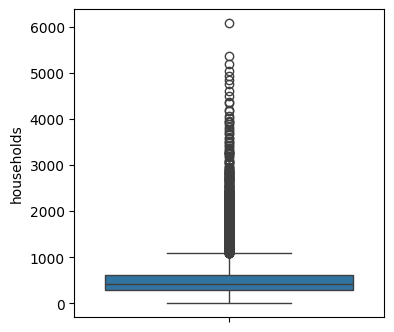

In [13]:
plt.figure(figsize=(4,4))
sns.boxplot(housing['households'])
plt.show()

There are outliers for population and household numbers. Also the histograms are right skewed.

###Step 4: Analysis of multivariate variables
After analyzing the characteristics one by one, it is time to analyze them in relation to the predictor and to themselves, in order to draw clearer conclusions about their relationships and to be able to make decisions about their processing.

Thus, if we would like to eliminate a variable due to a high amount of null values or certain outliers, it is necessary to first apply this process to ensure that the elimination of certain values are not critical for prediction or classification.


#### Numerical-numerical analysis

When the two variables being compared have numerical data, the analysis is said to be numerical-numerical. Scatterplots and correlation analysis are used to compare two numerical columns.


<Axes: xlabel='population', ylabel='households'>

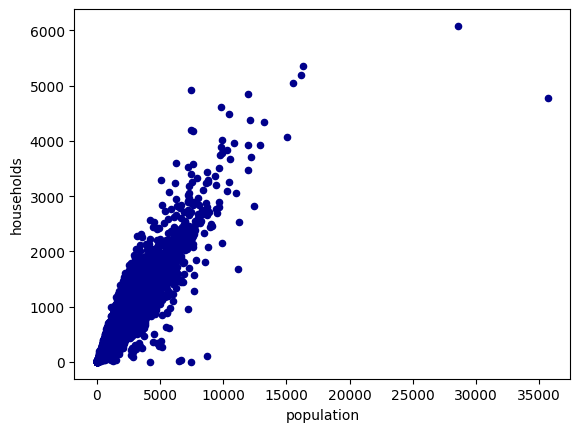

In [14]:
housing.plot.scatter(x='population', y='households', c='DarkBlue')

<Axes: xlabel='median_income', ylabel='median_house_value'>

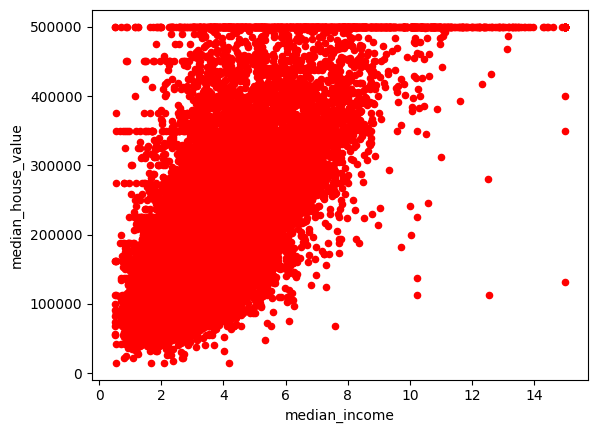

In [20]:
housing.plot.scatter(x='median_income', y='median_house_value', c='Red')

In [16]:
housing['population'].corr(housing['households'])

0.9072222660959613

In [17]:
housing['households'].corr(housing['median_income'])

0.013033052400705798

In [18]:
housing['housing_median_age'].corr(housing['median_income'])

-0.11903398993785666

In [19]:
housing['median_income'].corr(housing['median_house_value'])

0.688075207958548

#### Numerical-categorical analysis


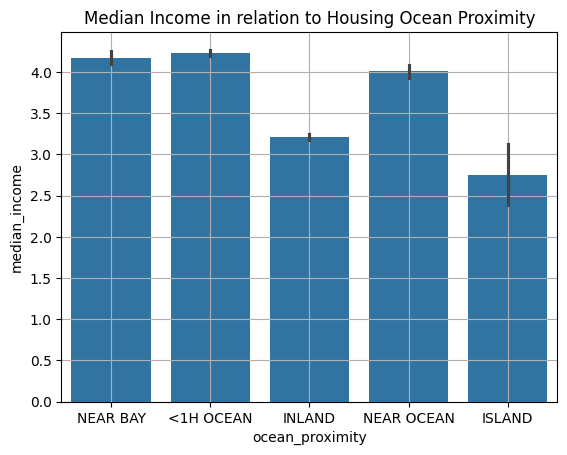

In [25]:
sns.barplot(data = housing, x = 'ocean_proximity', y = 'median_income')
plt.title('Median Income in relation to Housing Ocean Proximity')
plt.xticks(rotation=0)
plt.grid()
plt.show()

Median income is lower in the island area, followed by inland California. It is high in near bay, near ocean and < 1 hour away from ocean.

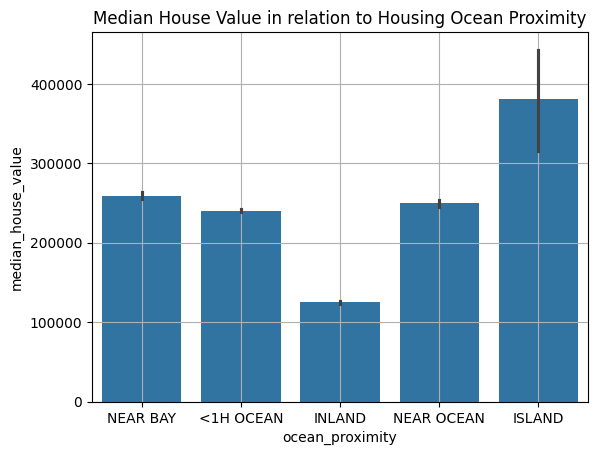

In [26]:
sns.barplot(data = housing, x = 'ocean_proximity', y = 'median_house_value')
plt.title('Median House Value in relation to Housing Ocean Proximity')
plt.xticks(rotation=0)
plt.grid()
plt.show()

Housing value is the highest in island properties, followed by properties near bay and near ocean. Inland properties have the least value.

### Step 5: Feature engineering

**Feature engineering** is a process that involves the creation of new features (or variables) from existing ones to improve model performance. This may involve a variety of techniques, such as normalization, data transformation, and so on. The goal is to improve the accuracy of the model and/or reduce the complexity of the model, thus making it easier to interpret.



#### Inference of new features

In [34]:
housing['avg_family_size'] = housing['population']/housing['households']

In [35]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_family_size
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.802260


#### Outlier analysis

In [36]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_family_size
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1243.333333


<Axes: >

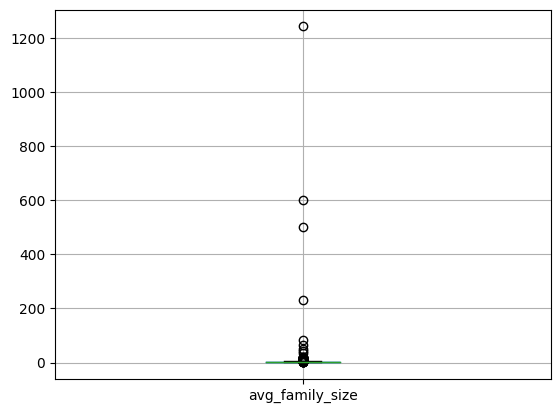

In [37]:
housing.boxplot(column=['avg_family_size'])

In [43]:
outliers = []
Q1 = housing['avg_family_size'].quantile(0.25)
Q3 = housing['avg_family_size'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for filtering
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers.extend(housing['avg_family_size'][(housing['avg_family_size'] <= lower_bound) | (housing['avg_family_size'] >= upper_bound)].tolist())

print (outliers)

[4.658823529411765, 10.272727272727273, 5.617647058823529, 4.666666666666667, 12.23404255319149, 5.467153284671533, 5.1753554502369665, 5.396, 9.534285714285714, 5.738028169014084, 17.177700348432055, 11.295918367346939, 4.8370044052863435, 12.212765957446809, 6.076923076923077, 6.061538461538461, 4.825, 4.942084942084942, 4.773809523809524, 4.608695652173913, 4.743473325766175, 5.520833333333333, 4.663865546218488, 5.206422018348624, 4.693009118541034, 4.809523809523809, 5.072664359861592, 5.769230769230769, 5.702247191011236, 4.897260273972603, 4.653950953678474, 5.2504672897196265, 4.866666666666666, 5.03030303030303, 5.286307053941909, 5.2, 14.0, 6.0, 12.84375, 4.907801418439717, 5.052132701421801, 4.75, 4.725589225589226, 4.993265993265993, 4.67816091954023, 6.076923076923077, 11.634146341463415, 5.2635983263598325, 6.497584541062802, 4.728110599078341, 4.860126582278481, 5.2622377622377625, 4.621621621621622, 9.4, 599.7142857142857, 4.589446589446589, 5.404651162790698, 5.9411764

<Axes: >

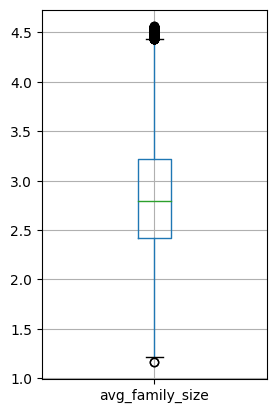

In [44]:
# Filter the DataFrame to remove outliers
housing_filtered = housing[(housing['avg_family_size'] >= lower_bound) & (housing['avg_family_size'] <= upper_bound)]
plt.subplot(1, 2, 1)
housing_filtered.boxplot(column='avg_family_size')

<Axes: >

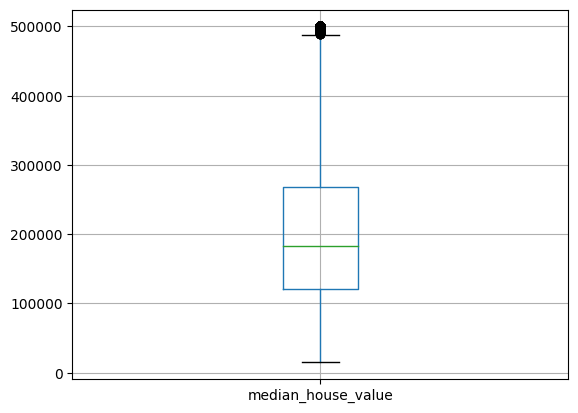

In [56]:
housing_filtered.boxplot(column=['median_house_value'])

#### Missing value analysis

In [46]:
housing_filtered.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,203
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
housing_filtered.dropna(inplace = True)

In [54]:
housing_filtered.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


#### Feature scaling

##### Split data into Training and Testing

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

X = housing_filtered.drop('median_house_value', axis=1)
y = housing_filtered['median_house_value']  # Target variable

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Normalization

In [60]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[['median_income', 'avg_family_size']])
X_test_scaled = scaler.transform(X_test[['median_income', 'avg_family_size']])

##### Min-Max Scaling

In [61]:
scaler = MinMaxScaler()

X_train_scaled1 = scaler.fit_transform(X_train[['median_income', 'avg_family_size']])
X_test_scaled1 = scaler.transform(X_test[['median_income', 'avg_family_size']])

### Step 6: Feature selection

In [62]:
from sklearn.feature_selection import SelectKBest, f_classif

In [63]:
selector = SelectKBest(score_func=f_classif, k=2)

In [64]:
# Convert the 'ocean_proximity' column to numerical representation using one-hot encoding
X = pd.get_dummies(X, columns=(['ocean_proximity']))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can proceed with feature selection
X_new = selector.fit_transform(X_train, y_train)

scores = selector.scores_
features = X.columns
mask = selector.get_support()
selected_features = features[mask]

print("Selected features:")
print(selected_features)

Selected features:
Index(['median_income', 'ocean_proximity_INLAND'], dtype='object')


In [65]:
X_new_housing = pd.DataFrame(X_new, columns=selected_features)
print("\nTransformed feature set:")
print(X_new_housing.head())


Transformed feature set:
   median_income  ocean_proximity_INLAND
0         0.8571                     1.0
1         3.5893                     0.0
2         4.1990                     0.0
3         3.8295                     1.0
4         3.8788                     0.0
